# **Importing the necessary modules**

In [47]:
from sklearn.model_selection import train_test_split  #used for splitting the data to training and validation sets
from keras.models import Sequential #used to initiating the NN
from collections import Counter
import matplotlib.pyplot as plt #used for plotting
from keras.layers import Dense #used to initiating the NN
from keras.optimizers import * #used as a parameter in the NN layers
from keras import callbacks #a call back returns info during the process of training. Think of it as a training log
import pandas as pd #used to import the dataset
import numpy as np #used for arrays and some computations
from sklearn.externals import joblib #Used to save the model after training

from google.colab import drive #used to import the dataset from my Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# **Dataset description**

In [63]:
#NOTE: to run this code on your machine, you have to upload the Phishing.csv dataset to your drive and change the path if necessary
df = pd.read_csv('/content/drive/My Drive/Phishing.csv') 

In [64]:
df.shape

(11055, 31)

In the output above, we can see that the dataset has 11055 entries and 31 columns, meaning 31 features

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In the output above, we have a closer look at the features that we are utilizing.

In [66]:
#Since the dataset contains -1 values, we are changing them to 0 so that it becomes simpler (We now only have 0 and 1 as values)
df['Result'] = df['Result'].map({-1:0, 1:1})
df['Result'].unique()

array([0, 1])

In [67]:
classes = Counter(df['Result'].values) #count number of legit websites (entries having 'Class'=1) and phishing websites (websites having 'Class'='0')
classes.most_common()

[(1, 6157), (0, 4898)]

As seen in the output above, there are 6157 legit websites and 4898 phishing websites.

# **Splitting the dataset**

In [68]:
X=df.drop(columns=['Result']) #X is all the columns of the dataset except the result
X=X.values
y=df.Result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7)) #use a test size of 20% of the dataset

# **Setting up the neural network**

In [69]:
#Initiate the model
model = Sequential()

#The number of layers and units/layer used are from the OFS-NN paper (200-150-100-50-20-5-1 hidden units)
model.add(Dense(200, activation='relu',
          kernel_initializer='uniform',input_dim=X.shape[1]))
model.add(Dense(150, activation='relu',
          kernel_initializer='uniform'))
model.add(Dense(100, activation='relu',
          kernel_initializer='uniform'))
model.add(Dense(50, activation='relu',
          kernel_initializer='uniform'))
model.add(Dense(20, activation='relu',
          kernel_initializer='uniform'))
model.add(Dense(5, activation='relu',
          kernel_initializer='uniform'))
model.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 200)               6200      
_________________________________________________________________
dense_57 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_58 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_59 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_60 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_61 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_62 (Dense)             (None, 1)                

# **Training and evaluating the neural network**

In [70]:
es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5) #A call back is , as mentioned above, used for logging training and gathering statistics
history = model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1, callbacks=[es_cb])
scores = model.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))

Epoch 1/100
885/885 [==============================] - 2s 2ms/step - loss: 0.2499 - accuracy: 0.8893
Epoch 2/100
885/885 [==============================] - 2s 2ms/step - loss: 0.1626 - accuracy: 0.9329
Epoch 3/100
885/885 [==============================] - 2s 2ms/step - loss: 0.1411 - accuracy: 0.9389
Epoch 4/100
885/885 [==============================] - 2s 2ms/step - loss: 0.1245 - accuracy: 0.9453
Epoch 5/100
885/885 [==============================] - 2s 2ms/step - loss: 0.1200 - accuracy: 0.9478
Epoch 6/100
885/885 [==============================] - 2s 2ms/step - loss: 0.1051 - accuracy: 0.9544
Epoch 7/100
885/885 [==============================] - 2s 2ms/step - loss: 0.0981 - accuracy: 0.9582
Epoch 8/100
885/885 [==============================] - 2s 2ms/step - loss: 0.0903 - accuracy: 0.9604
Epoch 9/100
885/885 [==============================] - 2s 2ms/step - loss: 0.0890 - accuracy: 0.9629
Epoch 10/100
885/885 [==============================] - 2s 2ms/step - loss: 0.0864 - accura

# **Plotting the training loss and accuracy**

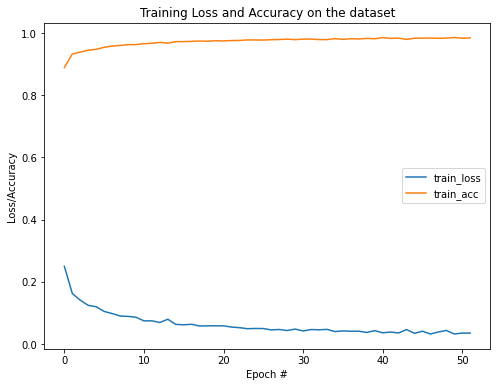

In [71]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(0,52), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,52), history.history["accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.show()

# **Trying to optimize the model using TDLHBA hyperparameter approach**

In [32]:
#Initiate the model
model_TDLHBA = Sequential()

#The number of layers and units/layer used are from the OFS-NN paper (200-150-100-50-20-5-1 hidden units)
model_TDLHBA.add(Dense(200, activation='relu',
          kernel_initializer='uniform',input_dim=X.shape[1]))
model_TDLHBA.add(Dense(150, activation='relu',
          kernel_initializer='uniform'))
model_TDLHBA.add(Dense(100, activation='relu',
          kernel_initializer='uniform'))
model_TDLHBA.add(Dense(50, activation='relu',
          kernel_initializer='uniform'))
model_TDLHBA.add(Dense(20, activation='relu',
          kernel_initializer='uniform'))
model_TDLHBA.add(Dense(5, activation='relu',
          kernel_initializer='uniform'))
model_TDLHBA.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))
adam = Adam(lr=0.0017470)
model_TDLHBA.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# **Training and evaluating the TDLHBA model**

In [33]:
history_TDLHBA = model_TDLHBA.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1, callbacks=[es_cb])

scores = model_TDLHBA.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with TDLHBA hyperparameter settings {0:.2f}%'.format(scores[1]*100))

Epoch 1/100
885/885 [==============================] - 2s 2ms/step - loss: 0.2568 - accuracy: 0.8848
Epoch 2/100
885/885 [==============================] - 2s 3ms/step - loss: 0.1674 - accuracy: 0.9300
Epoch 3/100
885/885 [==============================] - 3s 3ms/step - loss: 0.1470 - accuracy: 0.9397
Epoch 4/100
885/885 [==============================] - 2s 3ms/step - loss: 0.1316 - accuracy: 0.9436
Epoch 5/100
885/885 [==============================] - 2s 2ms/step - loss: 0.1171 - accuracy: 0.9496
Epoch 6/100
885/885 [==============================] - 2s 2ms/step - loss: 0.1074 - accuracy: 0.9554
Epoch 7/100
885/885 [==============================] - 2s 2ms/step - loss: 0.0987 - accuracy: 0.9560
Epoch 8/100
885/885 [==============================] - 2s 2ms/step - loss: 0.0924 - accuracy: 0.9583
Epoch 9/100
885/885 [==============================] - 2s 2ms/step - loss: 0.0894 - accuracy: 0.9612
Epoch 10/100
885/885 [==============================] - 2s 2ms/step - loss: 0.0848 - accura

# **Plotting the training loss and accuracy for TDLHBA model**

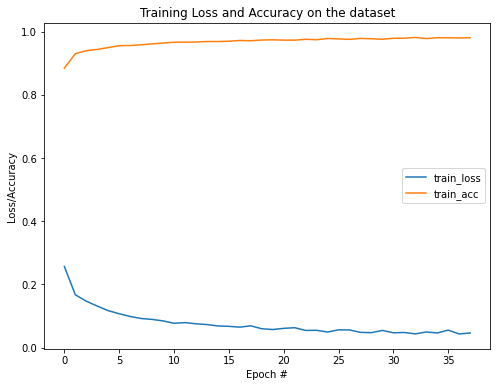

In [40]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(0,38), history_TDLHBA.history["loss"], label="train_loss")
plt.plot(np.arange(0,38), history_TDLHBA.history["accuracy"], label="train_acc")

plt.title("Training Loss and Accuracy on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.show()

TypeError: ignored